# Mini Proyecto 2 - Aprendizaje Supervisado
## Importado de Librerias

In [208]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
plt.rcParams["figure.figsize"] = (16,9)
plt.rcParams.update({'font.size': 26})

### Solución Cerrada de Regresión Lineal
- Utilizando numpy (np.random) genere 100 datos que se encuentren entre 0
y 3. Este vector representará su variable independiente.
- Con la misma librería genere los 100 datos de la variable dependiente de la
siguiente forma: 
$$ y = 5 +2x + u(-2,5) $$

In [209]:
def formula(x):
  return  5+2*x+np.random.uniform(-2,5)

vars_indep = 3*np.random.rand(100)
vars_depend = np.array([formula(x) for x in vars_indep])

### Visualización de Datos
- Por medio de matplotlib (o seaborn) genere un gráfico de dispersión (scatter
plot) entre la variable dependiente y la variable independiente.

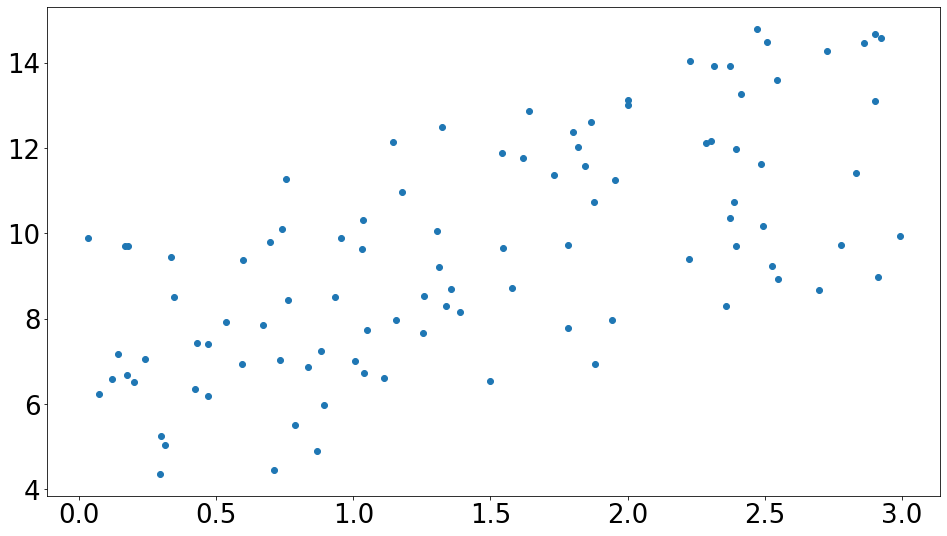

In [210]:
plt.scatter(vars_indep, vars_depend)
plt.show()

### Ajuste de Regresión Lineal
- Se encontrarán los parametros para la ecuacion se la siguiente forma: $\large{y = \beta_0 + \beta_1x_i}$ 


#### Método A: Paso a paso
- Utilizando **$$[\beta_0,\beta_1] = (X^{\text{T}}X)^{-1}X^{\text{T}}Y$$**

In [216]:
def lin_mf_fit(x_vals,y):
  x_vals = np.array(x_vals)
  y = np.array(y)
  x_vals.shape
  x_array = np.concatenate((np.ones(x_vals.shape),x_vals)).reshape(2,-1)
  x_transpose = np.transpose(x_array)
  x_dot_x = np.dot(x_array,x_transpose)
  x_inv = np.linalg.inv(x_dot_x)
  x_dot_y = np.dot(y,x_transpose)
  return np.dot(x_inv,x_dot_y)

def lin_mf_pred(x_vals,coefficients):
  return np.dot(coefficients[1], x_vals) + coefficients[0]

y_pred = lin_mf_pred(vars_indep, lin_mf_fit(vars_indep, vars_depend))

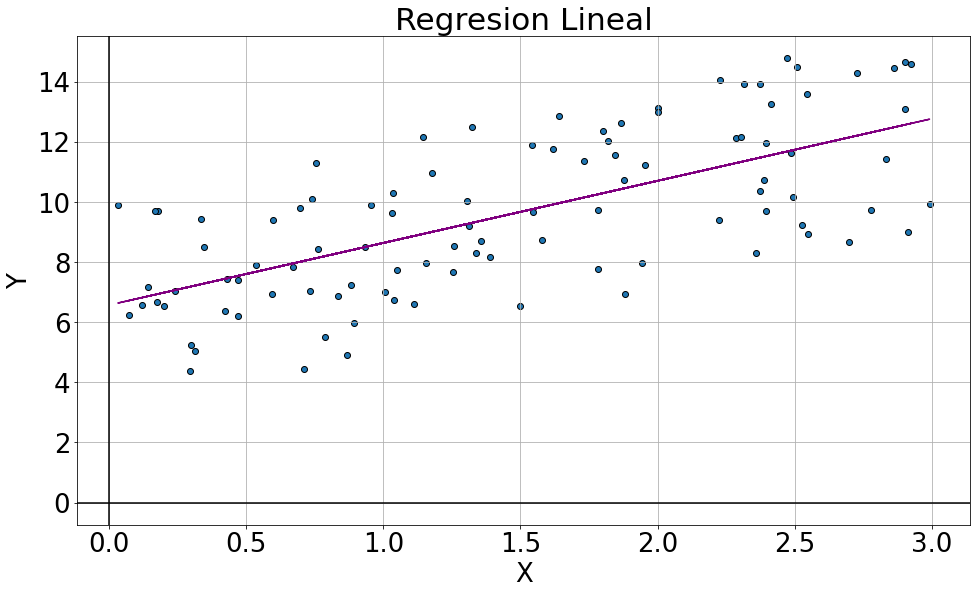

In [212]:
plt.scatter(vars_indep, vars_depend, edgecolors='black')
plt.plot(vars_indep, y_pred, color='purple')
plt.axvline(color = 'black')
plt.axhline(color = 'black')
plt.xlabel('X');plt.ylabel('Y');
plt.title('Regresion Lineal')
plt.grid()

#### Método B: Mediante *np.linalg*

In [213]:
x = vars_indep.reshape(100, 1)
X = np.append(x, np.ones((100, 1)), axis=1)
y = vars_depend.reshape(100, 1)
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
y_pred2 = theta[0]*x + theta[1]

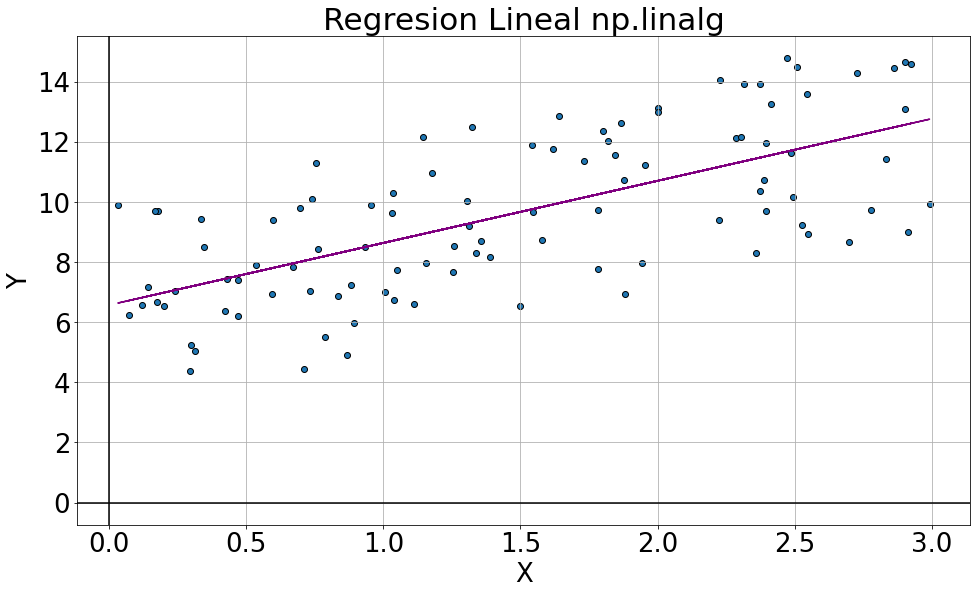

In [215]:
plt.scatter(vars_indep, vars_depend, edgecolors='black')
plt.plot(vars_indep, y_pred2, color='purple')
plt.axvline(color = 'black')
plt.axhline(color = 'black')
plt.xlabel('X');plt.ylabel('Y');
plt.title('Regresion Lineal np.linalg')
plt.grid()

### Regresión Polinomial
#### Carga de Base
- Leer el archivo `ts.csv`
- Tomar una muestra de 200 elementos

In [221]:
data = pd.read_csv('ts.csv')
data = data.head(200)

#### Visualizar los datos

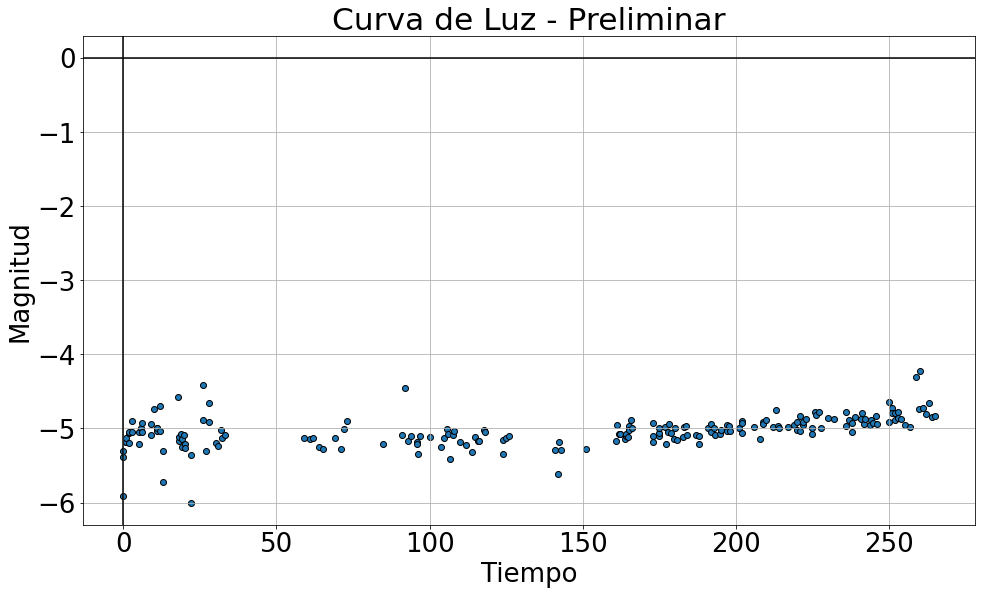

In [223]:
plt.scatter(data['tiempo'], data['magnitud'], edgecolors='black')
plt.axvline(color = 'black')
plt.axhline(color = 'black')
plt.xlabel('Tiempo');plt.ylabel('Magnitud');
plt.title('Curva de Luz - Preliminar')
plt.grid()

#### Ajustes de Regresión Polinomial
Para esta primer ajuste se utilizará un ajuste polinomial mediante un polinomio de grado 3, luego, se realizaran los calculos usando un polinomio de grado 6, 9 y 10.

In [240]:
def poly_reg_fit(x,y, degree):
  x = np.array(x)
  y = np.array(y)
  x_array = np.concatenate((np.ones(x.shape), *[x**i for i in range(1, degree+1)])).reshape(degree+1,-1)
  x_transpose = np.transpose(x_array)
  x_dot_x = np.dot(x_array,x_transpose)
  x_inv = np.linalg.inv(x_dot_x)
  x_dot_y = np.dot(y,x_transpose)
  intercept_beta = np.dot(x_inv,x_dot_y)
  return intercept_beta

def poly_pred(x, coefficients, degree):
  ac = coefficients[0]
  for i in range(1, degree+1):
    ac += np.dot(coefficients[i], x**i)
  return ac

y_poly_preds = poly_pred(data['tiempo'], poly_reg_fit(data['tiempo'],data['magnitud'], 9), 9)

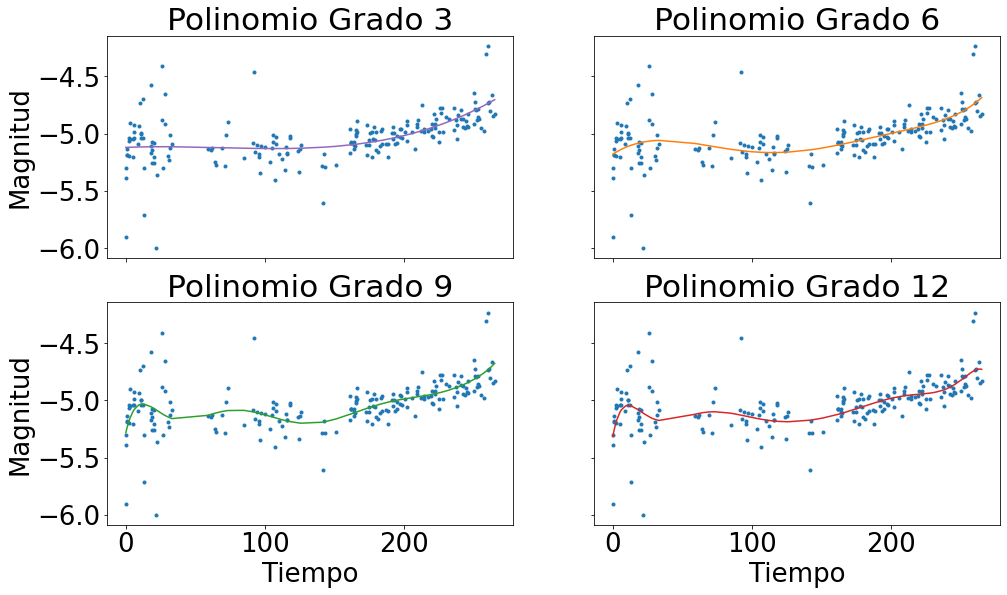

In [255]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(data['tiempo'], data['magnitud'], '.')
axs[0, 0].plot(data['tiempo'], poly_pred(data['tiempo'], poly_reg_fit(data['tiempo'],data['magnitud'], 3), 3), 'tab:purple')
axs[0, 0].set_title('Polinomio Grado 3')
axs[0, 1].plot(data['tiempo'], data['magnitud'], '.')
axs[0, 1].plot(data['tiempo'], poly_pred(data['tiempo'], poly_reg_fit(data['tiempo'],data['magnitud'], 6), 6), 'tab:orange')
axs[0, 1].set_title('Polinomio Grado 6')
axs[1, 0].plot(data['tiempo'], data['magnitud'], '.')
axs[1, 0].plot(data['tiempo'], poly_pred(data['tiempo'], poly_reg_fit(data['tiempo'],data['magnitud'], 9), 9), 'tab:green')
axs[1, 0].set_title('Polinomio Grado 9')
axs[1, 1].plot(data['tiempo'], data['magnitud'], '.')
axs[1, 1].plot(data['tiempo'], poly_pred(data['tiempo'], poly_reg_fit(data['tiempo'],data['magnitud'], 10), 10), 'tab:red')
axs[1, 1].set_title('Polinomio Grado 12')
for ax in axs.flat:
    ax.set(xlabel='Tiempo', ylabel='Magnitud')
for ax in axs.flat:
    ax.label_outer()

Se desprende que a medida que el grado del polinomio sube, la curva, se va ajustando cada vez mas a la forma en la que se distribuyen las muestras tomadas. Cabe descatar que no es conveniente usar un grado muy alto ya que el modelo puede empezar a integrar patrones de los datos.